# import libraries

In [67]:
import pickle
import sklearn
import timeit
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA, PCA
from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection  import learning_curve
from sklearn.metrics import accuracy_score

# Load data

In [2]:
# big_matrix = pickle.load(open("big_matrix.p", 'rb')) 
# normalized_matrix = pickle.load(open("big_matrix.p", 'rb')) 
normalized_matrix = pickle.load(open("normalized_matrix.p", 'rb')) 
rows_to_delete=np.arange(17,1440,18)
print(rows_to_delete)
normalized_matrix = np.delete(normalized_matrix, rows_to_delete, axis=0)
X=normalized_matrix.transpose()
y=pickle.load(open("labels.p", 'rb')) 
print("X :{}".format(X.shape))
print("Y : {}".format(len(y)))

[  17   35   53   71   89  107  125  143  161  179  197  215  233  251
  269  287  305  323  341  359  377  395  413  431  449  467  485  503
  521  539  557  575  593  611  629  647  665  683  701  719  737  755
  773  791  809  827  845  863  881  899  917  935  953  971  989 1007
 1025 1043 1061 1079 1097 1115 1133 1151 1169 1187 1205 1223 1241 1259
 1277 1295 1313 1331 1349 1367 1385 1403 1421 1439]
X :(296, 1360)
Y : 296


# PCA

In [54]:
n=15
pca=PCA(n_components=15) #PCA
X_t=pca.fit_transform(X)
print(X_t.shape)
X_range=np.arange(1,X_t.shape[1]+1,1)
print("Explained Variance for first first 10 principle components: ",pca.explained_variance_ratio_[:15])

(296, 15)
Explained Variance for first first 10 principle components:  [0.55707698 0.14746327 0.05348863 0.02069305 0.01759905 0.01520996
 0.01228379 0.01136201 0.01007989 0.00882088 0.00810265 0.00719482
 0.00671013 0.00586415 0.00553228]


Text(0, 0.5, 'Percentage of variance explained')

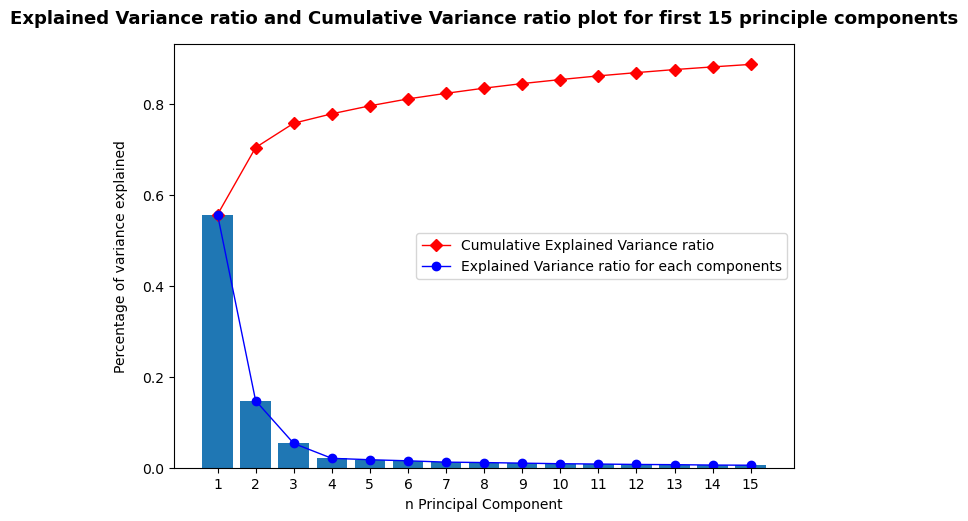

In [55]:
# fig, axarr = plt.subplots(2, 4, figsize=(12, 6))
plt.figure(figsize=(8,5.5))
plt.plot(X_range, np.cumsum(pca.explained_variance_ratio_[:15]),marker="D",c="red",linewidth=1,label="Cumulative Explained Variance ratio")
plt.bar(X_range,pca.explained_variance_ratio_[:15])
plt.plot(X_range, pca.explained_variance_ratio_[:15],marker="o",c="blue",linewidth=1,label="Explained Variance ratio for each components")
plt.legend(loc='center right')
plt.xticks(X_range)
plt.title("Explained Variance ratio and Cumulative Variance ratio plot for first 15 principle components",fontsize = 13,y=1.03,fontweight = 'bold')
plt.xlabel('n Principal Component', fontsize = 10)
plt.ylabel('Percentage of variance explained', fontsize = 10,labelpad=10)

In [56]:
# plt.figure(figsize=(8,5.5))

# color= ['red' if l =="correct" else "pink" if l =="incorrect_out_knees" else "blue" if l =="incorrect_lean_fwd" else "purple" if l =="incorrect_not_low" else "red" if l =="incorrect_chin_tuck" else "yellow" if l =="incorrect_feet_close" else 'green' for l in y]
# plot=plt.scatter(X_t[:,0],X_t[:,1],c=color,cmap=plt.cm.coolwarm, alpha=1,marker=".",s=2,)
# clb = plt.colorbar(plot)
# plt.xlabel("first principle component", fontsize=12)
# plt.ylabel("second principle component", fontsize=12)
# plt.title('2D PCA of Fashion-MNIST dataset', fontweight = 'bold', fontsize=15)
# plt.show()

# SVM

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(236, 15)
(60, 15)


In [61]:
models=[]
accuracies = []
training_times=[]
for degree in range(1, 5):
    models.append(SVC(kernel='poly', degree=degree, gamma='auto'))
for model in models:
    start = timeit.default_timer()
    model.fit(X_train,y_train)
    stop = timeit.default_timer()
    y_pred = model.predict(X_test)
    print(f'My first SVM classifier training_set accuracy: {model.score(X_train,y_train)}')
    print(f'My first SVM classifier training_set accuracy: {model.score(X_test,y_test)}')
    print(f'My first SVM classifier test_set accuracy: {accuracy_score(y_test, y_pred)}')
    accuracies.append(accuracy_score(y_test, y_pred))
    time=stop-start
    training_times.append(time)


My first SVM classifier training_set accuracy: 0.9364406779661016
My first SVM classifier training_set accuracy: 0.7
My first SVM classifier test_set accuracy: 0.7
My first SVM classifier training_set accuracy: 1.0
My first SVM classifier training_set accuracy: 0.6833333333333333
My first SVM classifier test_set accuracy: 0.6833333333333333
My first SVM classifier training_set accuracy: 1.0
My first SVM classifier training_set accuracy: 0.7333333333333333
My first SVM classifier test_set accuracy: 0.7333333333333333
My first SVM classifier training_set accuracy: 1.0
My first SVM classifier training_set accuracy: 0.6666666666666666
My first SVM classifier test_set accuracy: 0.6666666666666666


['Degree 1', 'Degree 2', 'Degree 3', 'Degree 4']


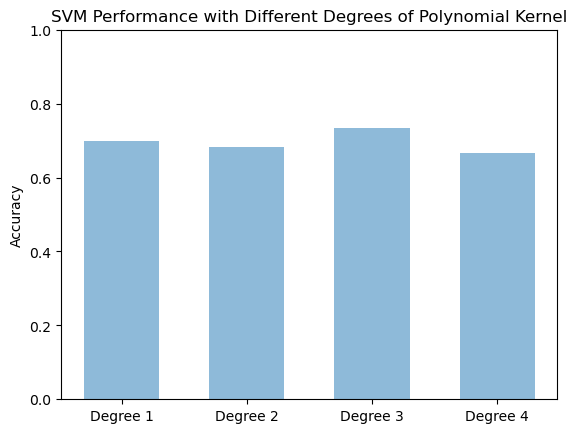

In [62]:
#plot the results in a bar chart
x_labels = [f"Degree {degree}" for degree in range(1, 5)]
print(x_labels)
x_pos = np.arange(len(x_labels))
plt.bar(x_pos, accuracies, 0.6,align='center', alpha=0.5)
plt.xticks(x_pos, x_labels)
plt.ylabel('Accuracy')

plt.title('SVM Performance with Different Degrees of Polynomial Kernel')
plt.ylim(0,1)
plt.show()

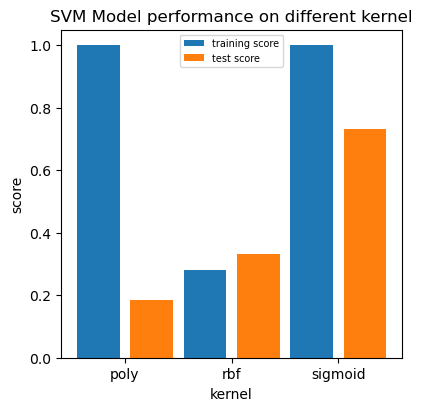

In [63]:
models=[]
accuracies = []
training_times=[]
kernels=['rbf','sigmoid','poly']
for i in range(len(kernels)):
    models.append(SVC(kernel=kernels[i],gamma='auto'))

n=len(kernel)
training_score=[]
test_score=[]
times=[]
for i in range(n):
    model = models[i]
    start = timeit.default_timer()
    model.fit(X_train, y_train)
    stop = timeit.default_timer()
    model.fit(X_train,y_train)
    r1 = model.score(X_train, y_train)
    training_score.append(r1)
    r2 = model.score(X_test, y_test)
    test_score.append(r2)
    time=stop-start
    times.append(time)

X_axis=np.arange(n)
plt.figure(figsize=(4,4), layout='constrained')
plt.bar(X_axis-0.25, training_score,0.4, label='training score') 
plt.bar(X_axis+0.25, test_score, 0.4,label='test score')  
plt.xlabel('kernel')
plt.xticks(X_axis,kernel)
plt.ylabel('score')
plt.title("SVM Model performance on different kernel")
plt.legend(fontsize=7); 

# plt.figure(figsize=(4,4), layout='constrained')
# plt.bar(X_axis, times, 0.5,label='second') 
# plt.xlabel('kernel')
# plt.xticks(X_axis,kernel)
# plt.ylabel('second')
# plt.title("training time with different kernel")
# plt.legend(fontsize=7);  

/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


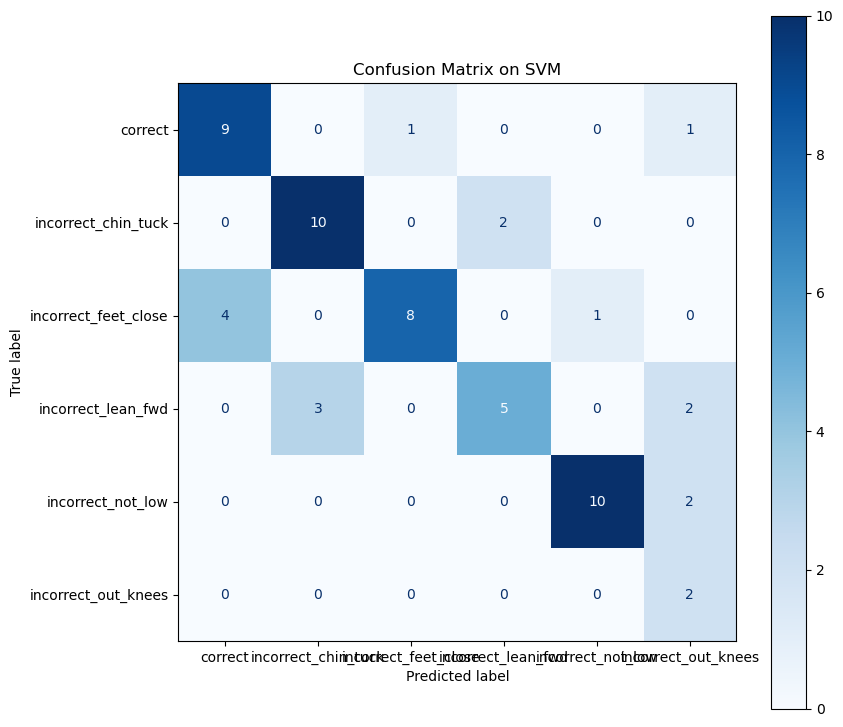

In [65]:
model=SVC(kernel='poly',gamma='auto')
model.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(model, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix on SVM")
title = "Confusion Matrix"

# Decision Tree

In [473]:
from sklearn.tree import DecisionTreeClassifier

In [483]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {clf.score(X_train, y_train)}")
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
Accuracy: 0.5


/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


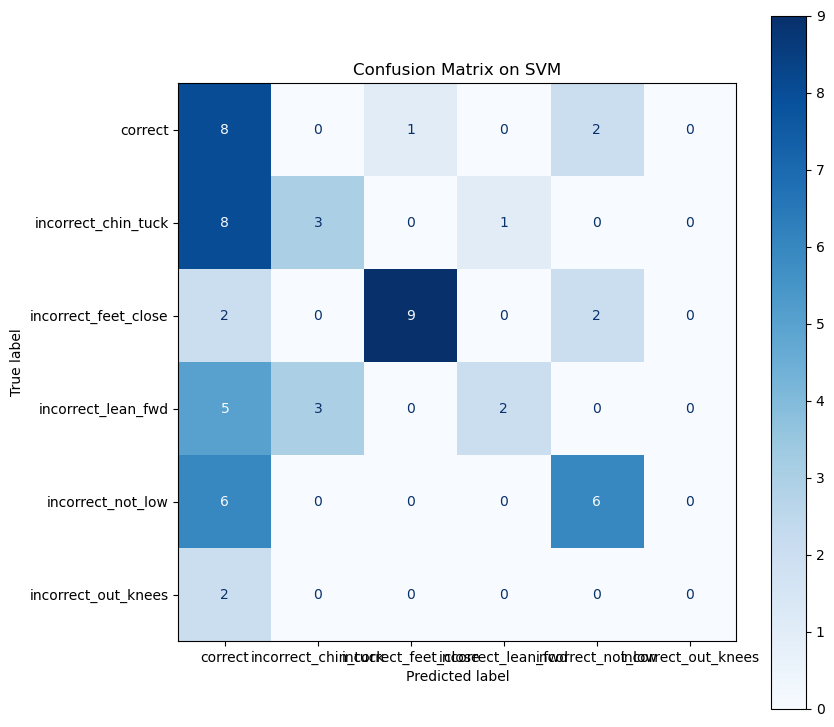

In [475]:
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(svm, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix Decision tree")
title = "Confusion Matrix"

# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
models=[]
accuracies = []
training_times=[]
for i in range(1, 8):
    models.append(KNeighborsClassifier(n_neighbors=i))
for model in models:
    start = timeit.default_timer()
    model.fit(X_train,y_train)
    stop = timeit.default_timer()
    y_pred = model.predict(X_test)
    print(f'My first SVM classifier training_set accuracy: {model.score(X_train,y_train)}')
    print(f'My first SVM classifier training_set accuracy: {model.score(X_test,y_test)}')
    print(f'My first SVM classifier test_set accuracy: {accuracy_score(y_test, y_pred)}')
    accuracies.append(accuracy_score(y_test, y_pred))
    time=stop-start
    training_times.append(time)

My first SVM classifier training_set accuracy: 1.0
My first SVM classifier training_set accuracy: 0.7833333333333333
My first SVM classifier test_set accuracy: 0.7833333333333333
My first SVM classifier training_set accuracy: 0.8347457627118644
My first SVM classifier training_set accuracy: 0.7
My first SVM classifier test_set accuracy: 0.7
My first SVM classifier training_set accuracy: 0.826271186440678
My first SVM classifier training_set accuracy: 0.6666666666666666
My first SVM classifier test_set accuracy: 0.6666666666666666
My first SVM classifier training_set accuracy: 0.8177966101694916
My first SVM classifier training_set accuracy: 0.7
My first SVM classifier test_set accuracy: 0.7
My first SVM classifier training_set accuracy: 0.7923728813559322
My first SVM classifier training_set accuracy: 0.6833333333333333
My first SVM classifier test_set accuracy: 0.6833333333333333
My first SVM classifier training_set accuracy: 0.7245762711864406
My first SVM classifier training_set acc

['n_neighbors 1', 'n_neighbors 2', 'n_neighbors 3', 'n_neighbors 4', 'n_neighbors 5', 'n_neighbors 6', 'n_neighbors 7']


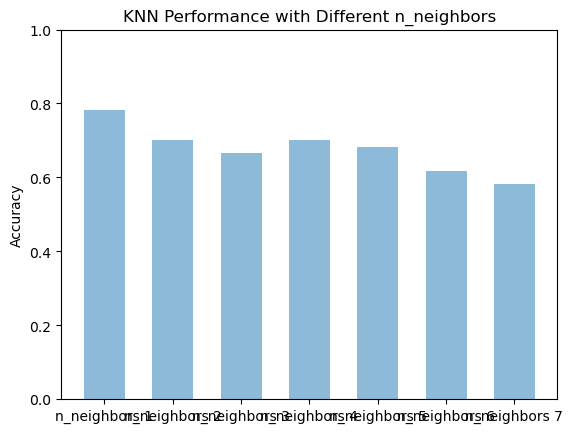

In [105]:
x_labels = [f"n_neighbors {n_neighbors}" for n_neighbors in range(1, 8)]
print(x_labels)
x_pos = np.arange(len(x_labels))
plt.bar(x_pos, accuracies, 0.6,align='center', alpha=0.5)
plt.xticks(x_pos, x_labels)
plt.ylabel('Accuracy')
plt.title('KNN Performance with Different n_neighbors')
plt.ylim(0,1)
plt.show()

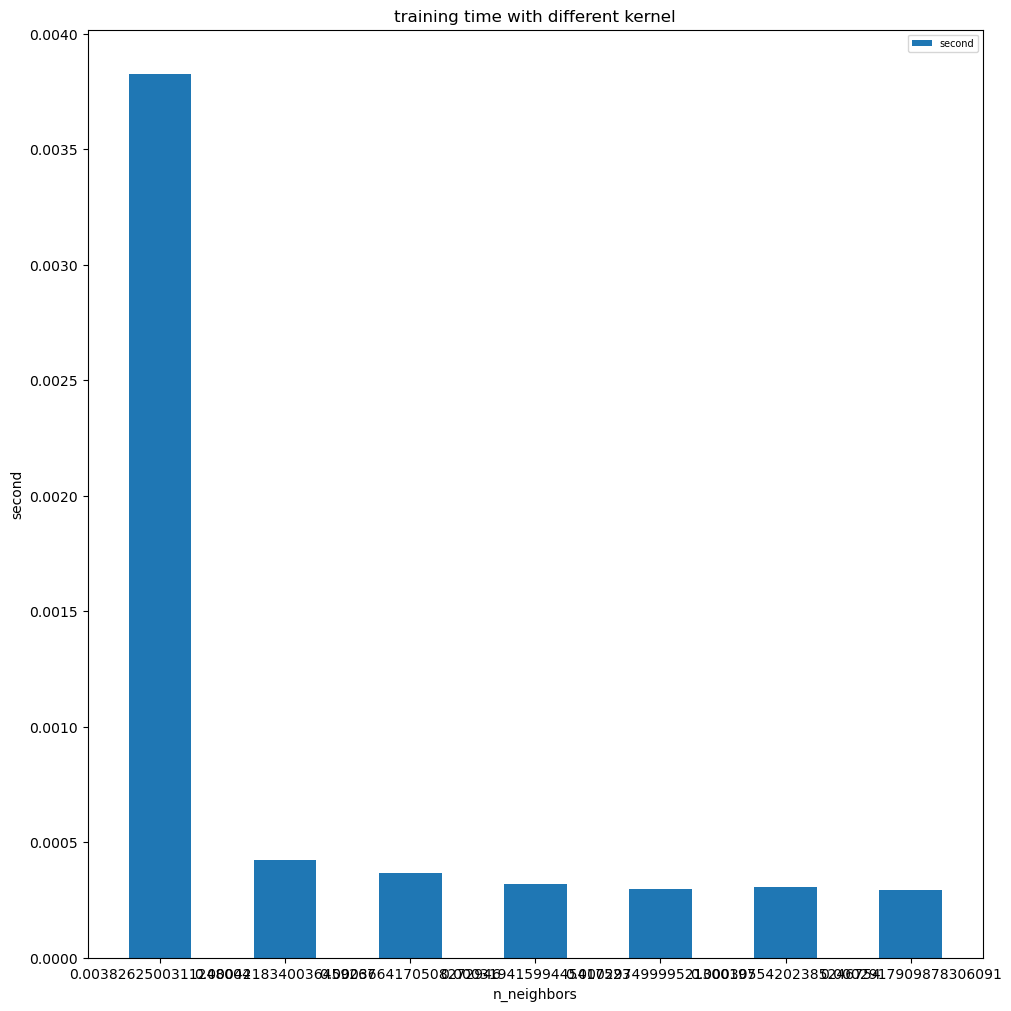

In [107]:
plt.figure(figsize=(10,10), layout='constrained')
plt.bar(x_pos, training_times, 0.5,label='second') 
plt.xlabel('n_neighbors')
plt.xticks(x_pos,training_times)
plt.ylabel('second')
plt.title("training time with different kernel")
plt.legend(fontsize=7);  

/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


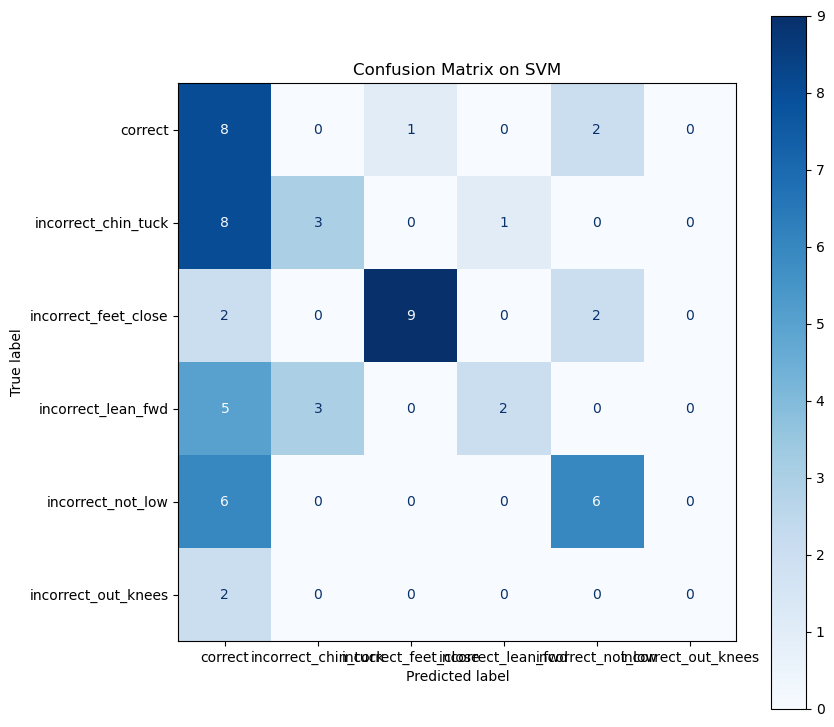

In [478]:
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(svm, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix on KNN")
title = "Confusion Matrix"

# ANN

In [479]:
from sklearn.neural_network import MLPClassifier

In [480]:
clf = MLPClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {clf.score(X_train, y_train)}")
print(f"Accuracy: {accuracy}")

Accuracy: 0.847457627118644
Accuracy: 0.65


/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


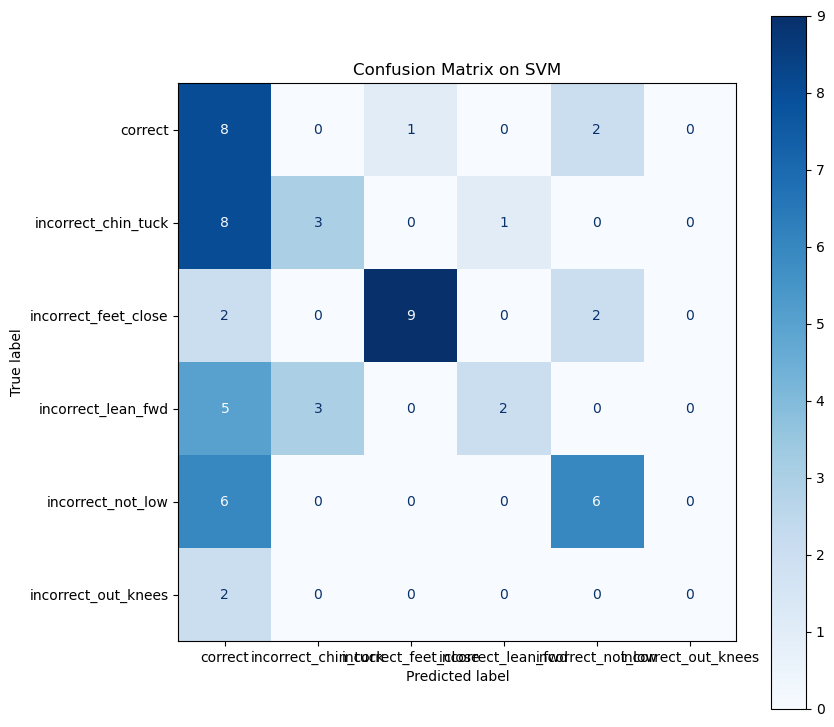

In [481]:
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(svm, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix on ANN")
title = "Confusion Matrix"